In [2065]:
import pandas as pd
data = pd.read_csv('data2.csv')
data.head()
print(data)

      n       E            Ko     T              K
0     3  240.00  1.690280e+12   923       0.044191
1     3  241.00  1.925542e+12   924       0.045718
2     3  241.00  1.925542e+12   925       0.047296
3     3  242.00  2.193549e+12   926       0.048944
4     3  243.00  2.498858e+12   927       0.050661
...  ..     ...           ...   ...            ...
1633  6  249.71  1.180000e+18  1005  124000.000000
1634  7  249.71  3.350000e+17  1002   32200.000000
1635  7  249.71  3.350000e+17  1003   33100.000000
1636  7  249.71  3.350000e+17  1004   34100.000000
1637  7  249.71  3.350000e+17  1005   35200.000000

[1638 rows x 5 columns]


<AxesSubplot: ylabel='Frequency'>

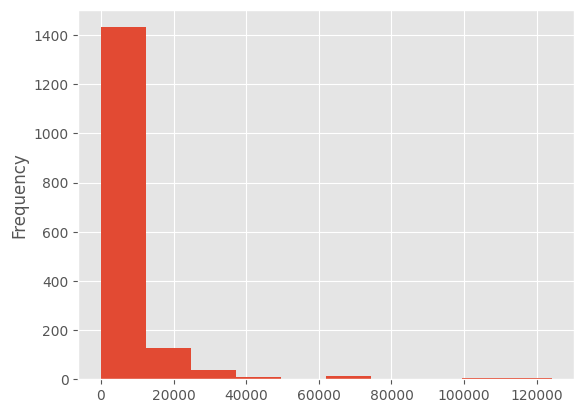

In [2066]:
data["K"].plot(kind="hist")

<AxesSubplot: ylabel='Frequency'>

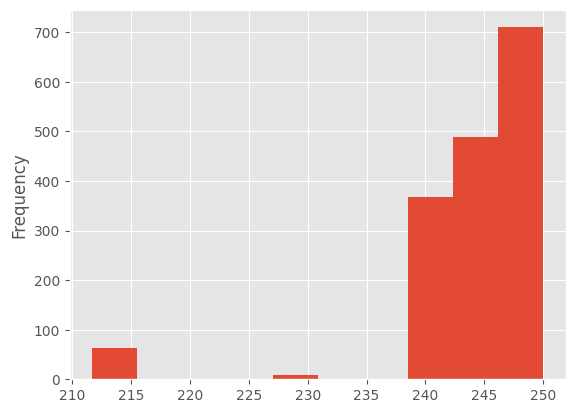

In [2067]:
data["E"].plot(kind="hist")

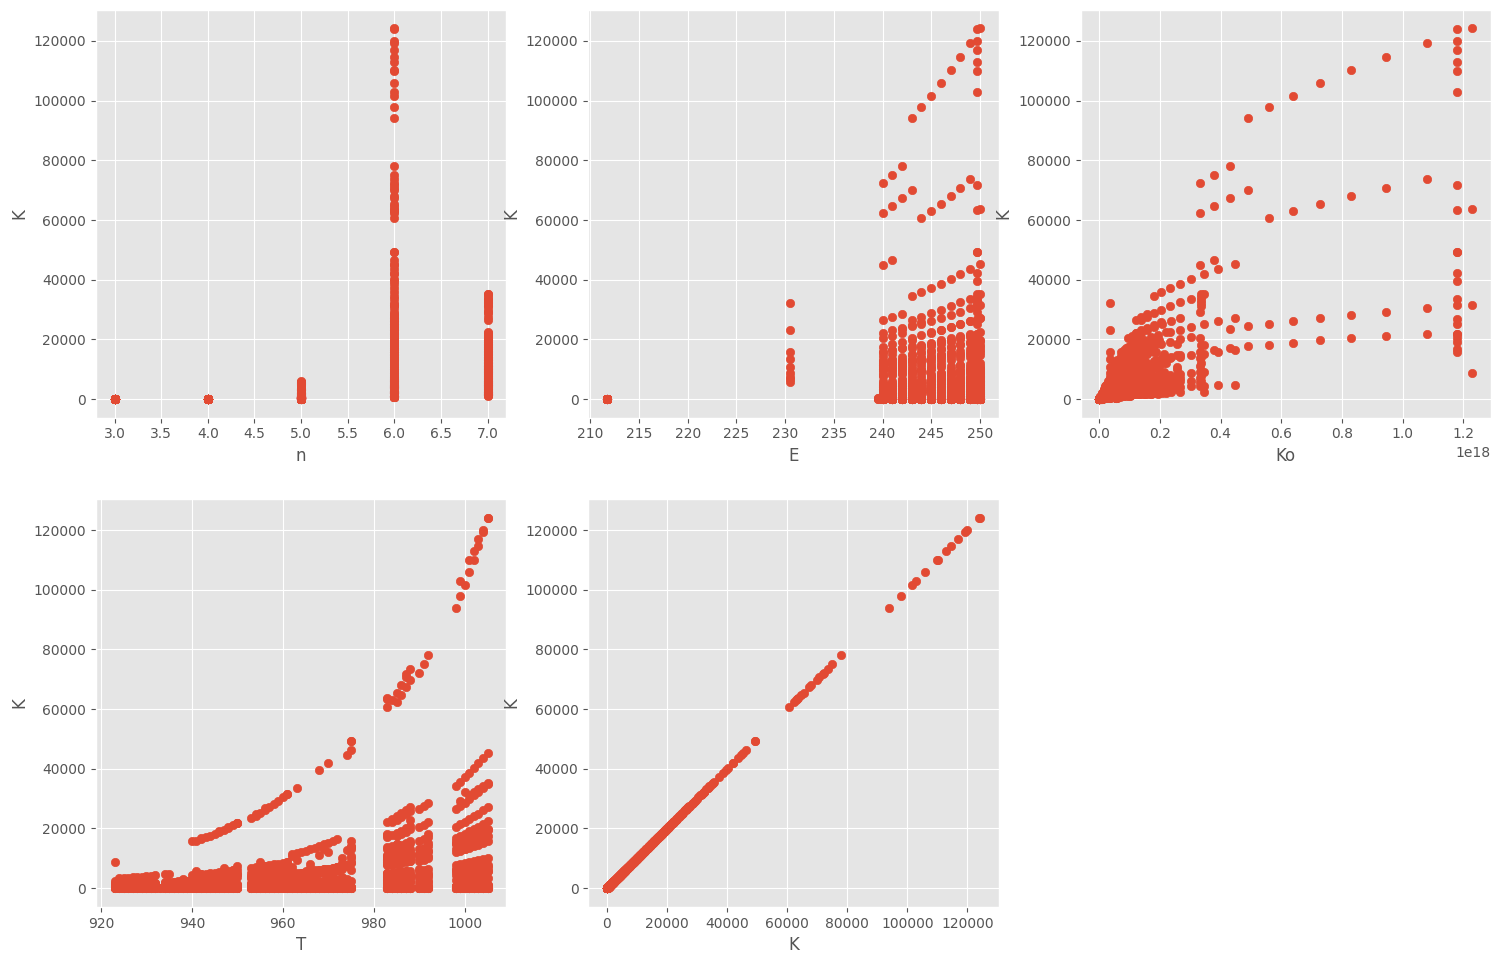

In [2068]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# # Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))

for index, feature_name in enumerate(data.columns.values):
    ax = fig.add_subplot(3, 3, index + 1)
    ax.scatter(data[feature_name], data['K'])
    ax.set_ylabel('K')
    ax.set_xlabel(feature_name)
 
plt.show()


In [2069]:
import numpy as np
# deli = np.where(data['E']<240)
# data.drop(deli[0], inplace = True)
# print(data)

# deli = np.where(data['K']>40000)
# data.drop(deli[0], inplace = True)
# print(data)

data = data.loc[~((data['E'] < 240) | (data['K'] > 40000))]

<AxesSubplot: ylabel='Frequency'>

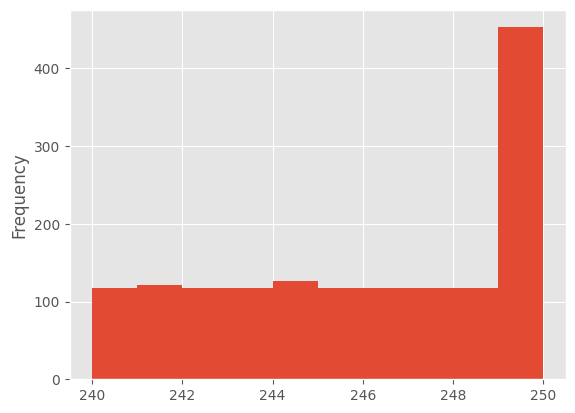

In [2070]:
data["E"].plot(kind="hist")


<AxesSubplot: ylabel='Frequency'>

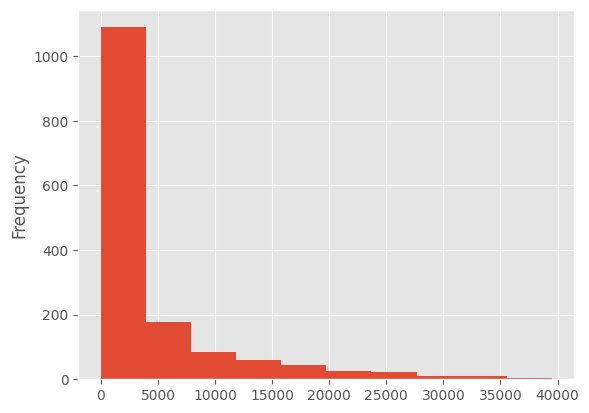

In [2071]:
data["K"].plot(kind="hist")

<AxesSubplot: xlabel='n', ylabel='K'>

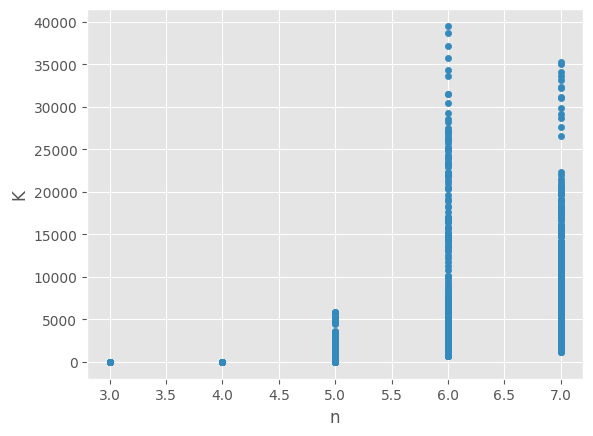

In [2072]:
data.plot(x="n", y="K", kind="scatter")

<AxesSubplot: ylabel='Frequency'>

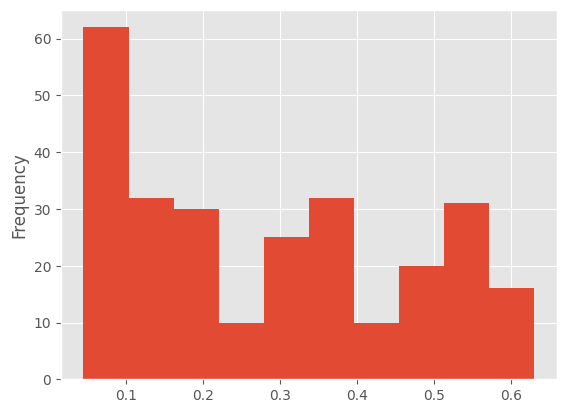

In [2073]:
data[data["n"] == 3]["K"].plot(kind="hist")

<AxesSubplot: xlabel='T', ylabel='K'>

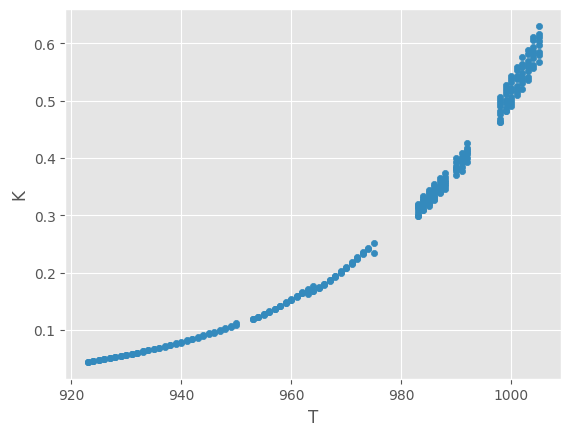

In [2074]:
data[data["n"] == 3].plot(x="T", y="K", kind="scatter")

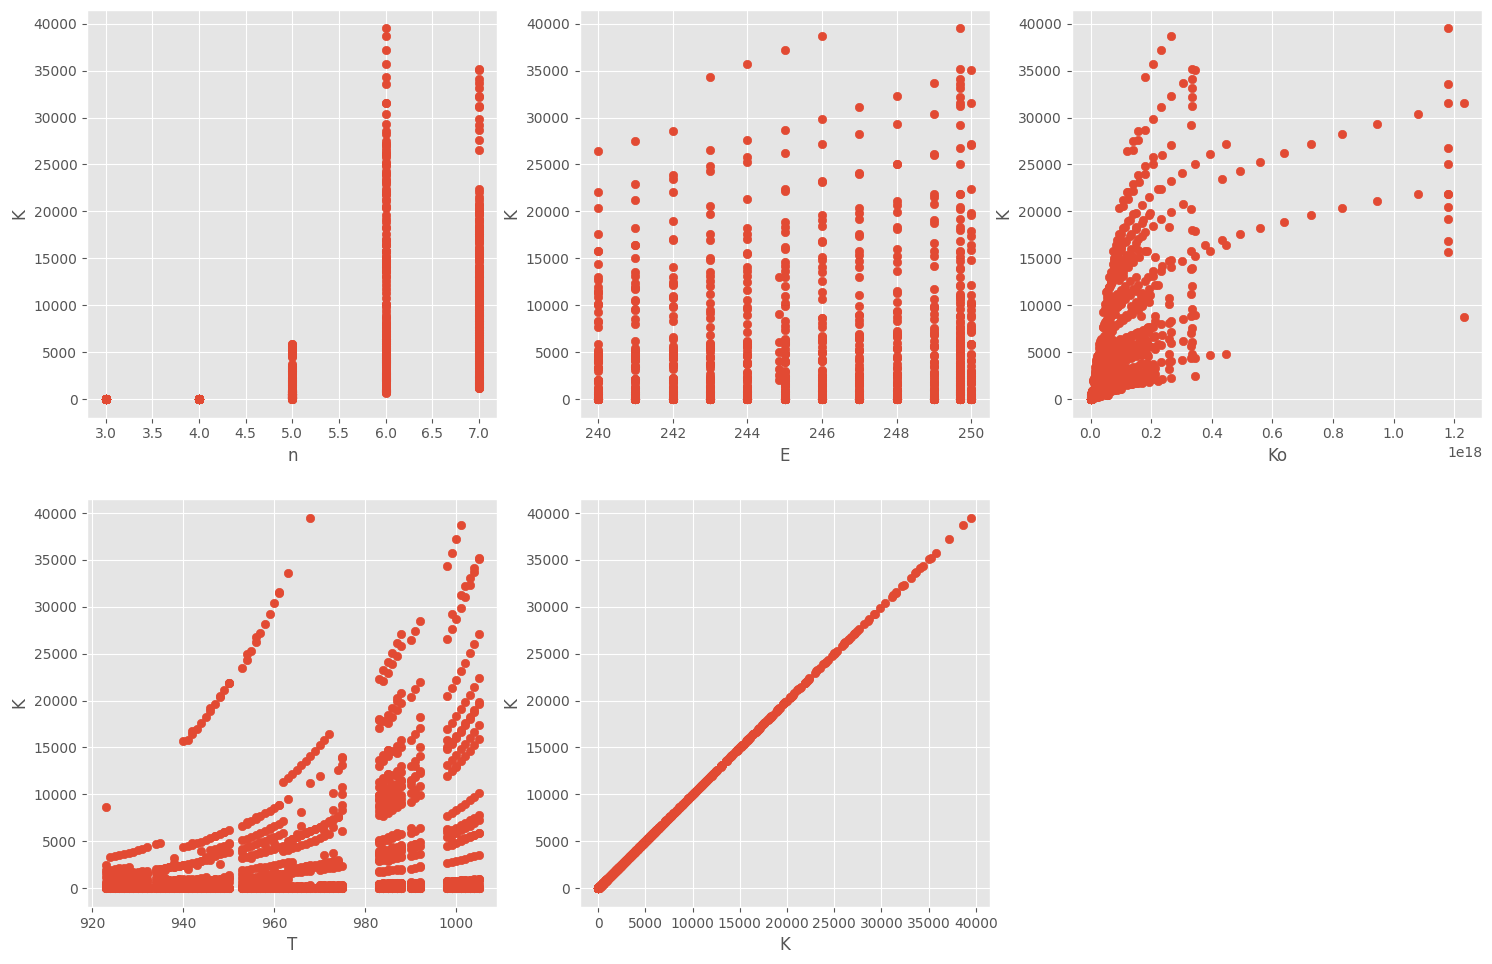

In [2075]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# # Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))

for index, feature_name in enumerate(data.columns.values):
    ax = fig.add_subplot(3, 3, index + 1)
    ax.scatter(data[feature_name], data['K'])
    ax.set_ylabel('K')
    ax.set_xlabel(feature_name)
 
plt.show()



In [2076]:

X = data[['n','T']]
y = data['K']
print(X)
print(y)

      n     T
0     3   923
1     3   924
2     3   925
3     3   926
4     3   927
...  ..   ...
1629  5  1005
1634  7  1002
1635  7  1003
1636  7  1004
1637  7  1005

[1523 rows x 2 columns]
0           0.044191
1           0.045718
2           0.047296
3           0.048944
4           0.050661
            ...     
1629     5855.171153
1634    32200.000000
1635    33100.000000
1636    34100.000000
1637    35200.000000
Name: K, Length: 1523, dtype: float64


In [2077]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.25)
 
print("Train data shape of X = % s and Y = % s : "%(
    
    x_train.shape, y_train.shape))
 
print("Test data shape of X = % s and Y = % s : "%(
    x_test.shape, y_test.shape))

Train data shape of X = (1142, 2) and Y = (1142,) : 
Test data shape of X = (381, 2) and Y = (381,) : 


In [2078]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)
 
# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)
 
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

print(mean_squared_error)
 
# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared Error on test set :  24582332.055025447
24582332.055025447
  Columns  Coefficient Estimate
0       n           2881.218492
1       T             76.418524


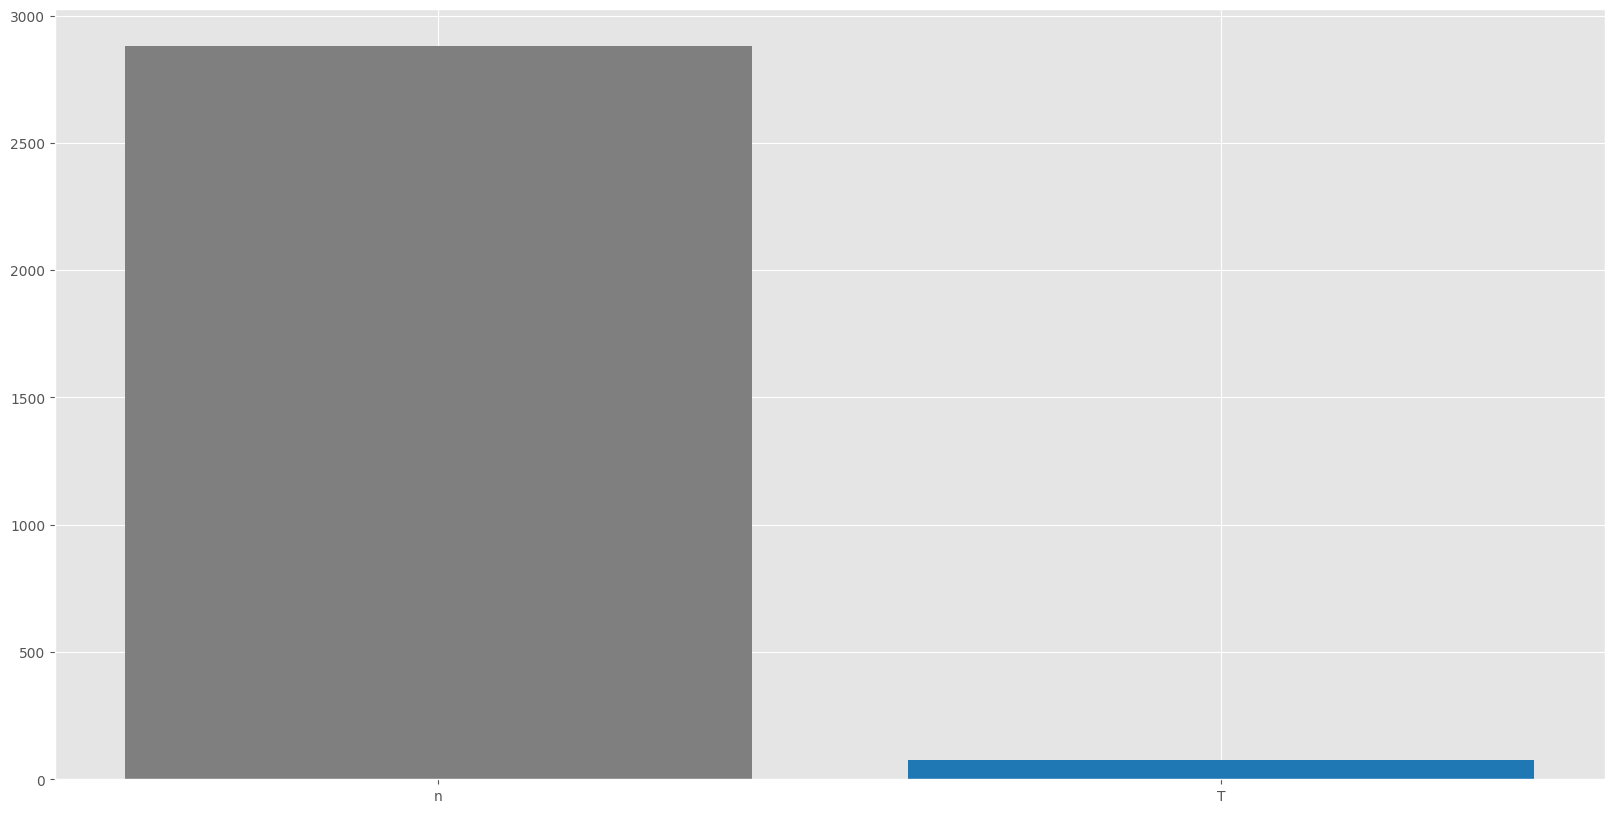

In [2079]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
 
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
 
ax.bar(lreg_coefficient["Columns"],
lreg_coefficient['Coefficient Estimate'],
color = color)
 
ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [2080]:

pred = lreg.predict(x_test)
k = np.mean((pred - y_test)**2)
# print(pred)
print(k)
lreg.score(x_test,y_test)



24582332.055025447


0.41197035754057554

Text(0.5, 1.0, 'Residual plot')

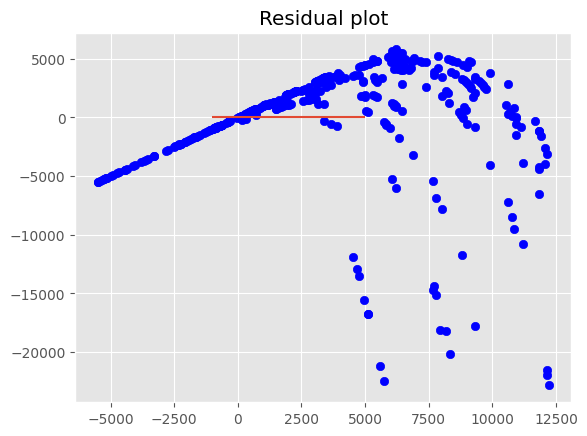

In [2081]:

x_plot = plt.scatter(pred, (pred - y_test), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

<AxesSubplot: title={'center': 'Modal Coefficients'}>

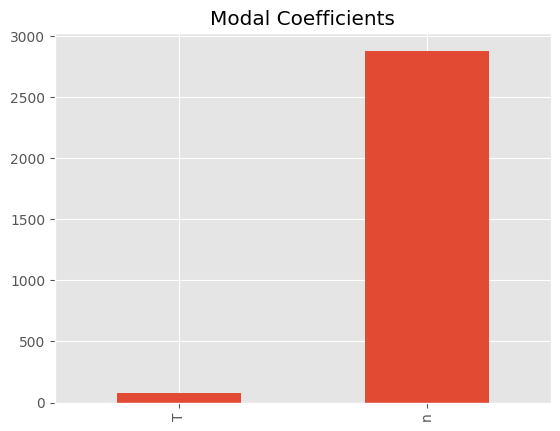

In [2082]:

predictors = x_train.columns
coef = pd.Series(lreg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [2134]:
from sklearn.linear_model import Ridge
## training the model
ridgeReg = Ridge(alpha=0.09, normalize=True)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)

mse = np.mean((pred - y_test)**2)
# print(mse)
ridgeReg.score(x_test,y_test) 



/Users/yashdalvi/.pyenv/versions/3.10.0/envs/test_project/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


0.411658454057629

In [2135]:
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(ridgeReg.coef_)
print(lreg_coefficient)

  Columns  Coefficient Estimate
0       n           2640.037339
1       T             69.723013


Text(0.5, 1.0, 'Residual plot')

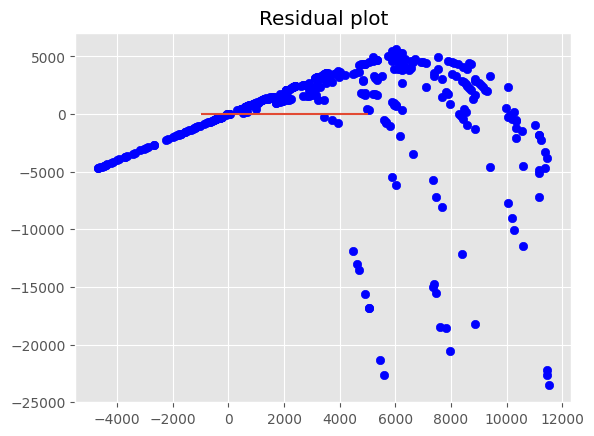

In [2136]:
x_plot = plt.scatter(pred, (pred - y_test), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

<AxesSubplot: title={'center': 'Modal Coefficients'}>

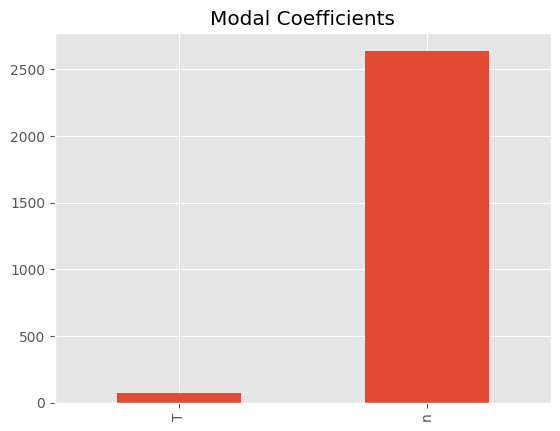

In [2137]:
predictors = x_train.columns
coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [2138]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.05, normalize=True)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_test)
# calculating mse
mse = np.mean((pred - y_test)**2)
lassoReg.score(x_test,y_test)


/Users/yashdalvi/.pyenv/versions/3.10.0/envs/test_project/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


0.4119912702053713

In [2139]:
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lassoReg.coef_)
print(lreg_coefficient)

  Columns  Coefficient Estimate
0       n           2879.975237
1       T             76.347515


/Users/yashdalvi/.pyenv/versions/3.10.0/envs/test_project/lib/python3.10/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Text(0.5, 1.0, 'Residual plot')

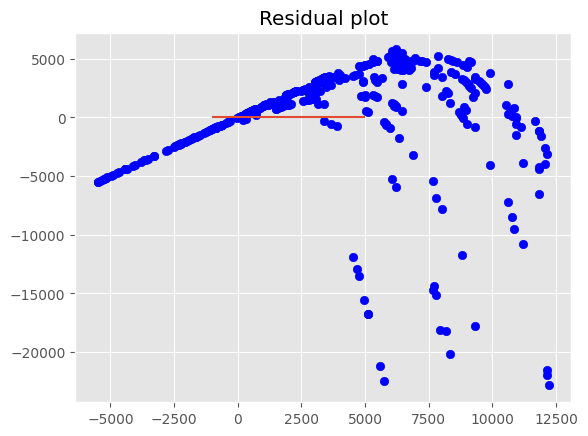

In [2140]:
x_plot = plt.scatter(pred, (pred - y_test), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

<AxesSubplot: title={'center': 'Modal Coefficients'}>

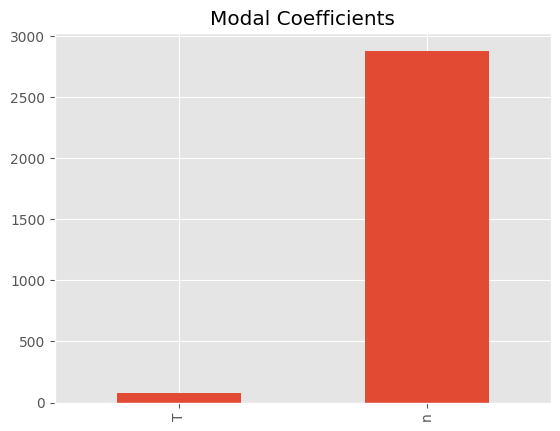

In [2141]:
predictors = x_train.columns
coef = pd.Series(lassoReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [2142]:
from sklearn.linear_model import ElasticNet
ENreg = ElasticNet(alpha=1, l1_ratio=0.3, normalize=False)
ENreg.fit(x_train,y_train)
pred = ENreg.predict(x_test)
#calculating mse
mse = np.mean((pred - y_test)**2)
ENreg.score(x_test,y_test)


/Users/yashdalvi/.pyenv/versions/3.10.0/envs/test_project/lib/python3.10/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


0.3919212444456168

In [2143]:
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(ENreg.coef_)
print(lreg_coefficient)

  Columns  Coefficient Estimate
0       n           2123.849267
1       T             75.010581


Text(0.5, 1.0, 'Residual plot')

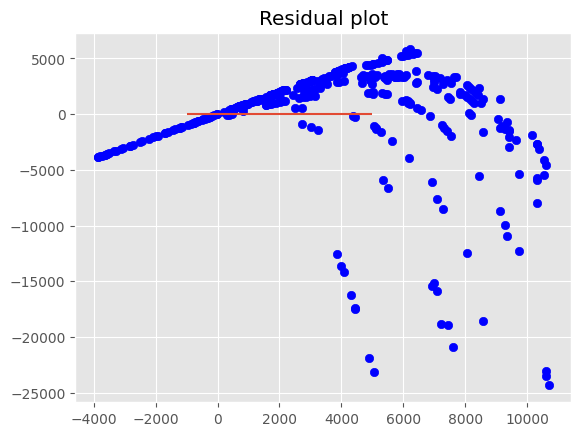

In [2144]:
x_plot = plt.scatter(pred, (pred - y_test), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

<AxesSubplot: title={'center': 'Modal Coefficients'}>

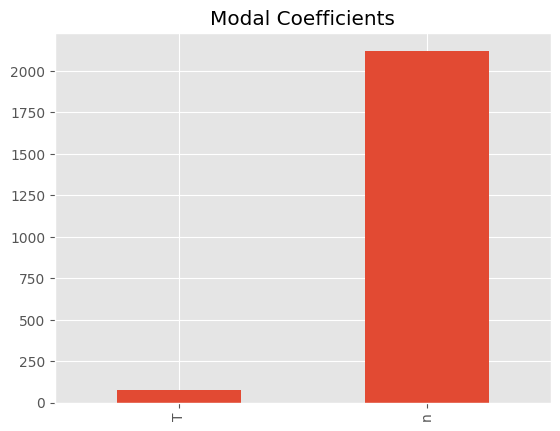

In [2145]:
predictors = x_train.columns
coef = pd.Series(ENreg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [2146]:

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

#Prediction of test set
pred_cv= mlr.predict(x_test)
#Predicted values

mse = np.mean((pred_cv - y_test)**2)
mlr.score(x_test,y_test)

0.41197035754057554

In [2147]:
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(mlr.coef_)
print(lreg_coefficient)

  Columns  Coefficient Estimate
0       n           2881.218492
1       T             76.418524


Text(0.5, 1.0, 'Residual plot')

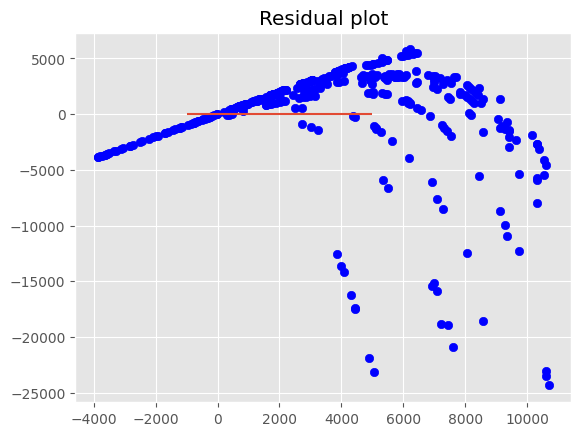

In [2148]:
x_plot = plt.scatter(pred, (pred - y_test), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

<AxesSubplot: title={'center': 'Modal Coefficients'}>

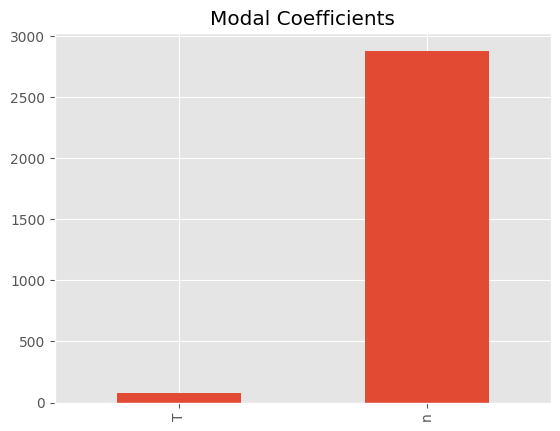

In [2149]:
predictors = x_train.columns
coef = pd.Series(mlr.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [2151]:
n = 8
T = 1023


features = np.array([[n,T]])
prediction = ENreg.predict(features)
print("Prediction value of K for n : {} and T : {} using Elastic Net Regression : {}".format(n,T,prediction))

prediction = lassoReg.predict(features)
print("Prediction value of K for n : {} and T : {} using Lasso regression : {}".format(n,T,prediction))

prediction = ridgeReg.predict(features)
print("Prediction value of K for n : {} and T : {} using Ridge Regression : {}".format(n,T,prediction))

prediction = lreg.predict(features)
print("Prediction value of K for n : {} and T : {} using Linear Regression  : {}".format(n,T,prediction))

prediction = mlr.predict(features)
print("Prediction value of K for n : {} and T : {} using Multiple Linear Regression  : {}".format(n,T,prediction))






Prediction value of K for n : 8 and T : 1023 using Elastic Net Regression : [14174.18187066]
Prediction value of K for n : 8 and T : 1023 using Lasso regression : [16460.71095995]
Prediction value of K for n : 8 and T : 1023 using Ridge Regression : [15405.30755956]
Prediction value of K for n : 8 and T : 1023 using Linear Regression  : [16468.13103019]
Prediction value of K for n : 8 and T : 1023 using Multiple Linear Regression  : [16468.13103019]


/Users/yashdalvi/.pyenv/versions/3.10.0/envs/test_project/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/Users/yashdalvi/.pyenv/versions/3.10.0/envs/test_project/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Users/yashdalvi/.pyenv/versions/3.10.0/envs/test_project/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/Users/yashdalvi/.pyenv/versions/3.10.0/envs/test_project/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/yashdalvi/.pyenv/versions/3.10.0/envs/test_project/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X d